## Loading data

In [1]:
import pandas as pd
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Загрузка данных
fraud_data = pd.read_parquet('transaction_fraud_data.parquet')
fraud_data['timestamp'] = pd.to_datetime(fraud_data['timestamp'])
currency_data = pd.read_parquet('historical_currency_exchange.parquet')

# Основные статистики
print("=== Общая статистика ===")
print(f"Всего транзакций: {len(fraud_data):,}")
print(f"Количество уникальных клиентов: {fraud_data['customer_id'].nunique():,}")
print(f"Количество уникальных карт: {fraud_data['card_number'].nunique():,}")

# Статистика по мошенничеству
fraud_stats = fraud_data['is_fraud'].value_counts(normalize=True) * 100
print("\n=== Статистика мошенничества ===")
print(f"Доля мошеннических транзакций: {fraud_stats[True]:.2f}%")
print(f"Доля легитимных транзакций: {fraud_stats[False]:.2f}%")

# Статистика по категориям вендоров
print("\n=== Распределение по категориям вендоров ===")
vendor_stats = fraud_data['vendor_category'].value_counts(normalize=True) * 100
print(vendor_stats.head(10))

# Статистика по сумме транзакций
print("\n=== Статистика сумм транзакций ===")
print(f"Средняя сумма: {fraud_data['amount'].mean():.2f}")
print(f"Медианная сумма: {fraud_data['amount'].median():.2f}")
print(f"Максимальная сумма: {fraud_data['amount'].max():.2f}")
print(f"Минимальная сумма: {fraud_data['amount'].min():.2f}")

# Дополнительная статистика по мошенническим транзакциям
fraud_transactions = fraud_data[fraud_data['is_fraud']]
print("\n=== Дополнительная статистика по мошенническим транзакциям ===")
print(f"Средняя сумма мошеннической транзакции: {fraud_transactions['amount'].mean():.2f}")
print(f"Наиболее частый тип карты: {fraud_transactions['card_type'].mode()[0]}")
print(f"Наиболее частый канал: {fraud_transactions['channel'].mode()[0]}")

=== Общая статистика ===
Всего транзакций: 7,483,766
Количество уникальных клиентов: 4,869
Количество уникальных карт: 5,000

=== Статистика мошенничества ===
Доля мошеннических транзакций: 19.97%
Доля легитимных транзакций: 80.03%

=== Распределение по категориям вендоров ===
vendor_category
Healthcare       12.517361
Restaurant       12.509450
Entertainment    12.509384
Retail           12.505509
Travel           12.504266
Gas              12.499068
Grocery          12.480735
Education        12.474228
Name: proportion, dtype: float64

=== Статистика сумм транзакций ===
Средняя сумма: 47924.68
Медианная сумма: 1177.45
Максимальная сумма: 6253152.62
Минимальная сумма: 0.01

=== Дополнительная статистика по мошенническим транзакциям ===
Средняя сумма мошеннической транзакции: 118773.59
Наиболее частый тип карты: Basic Debit
Наиболее частый канал: pos


### Смотрим распределения суммы транзакций

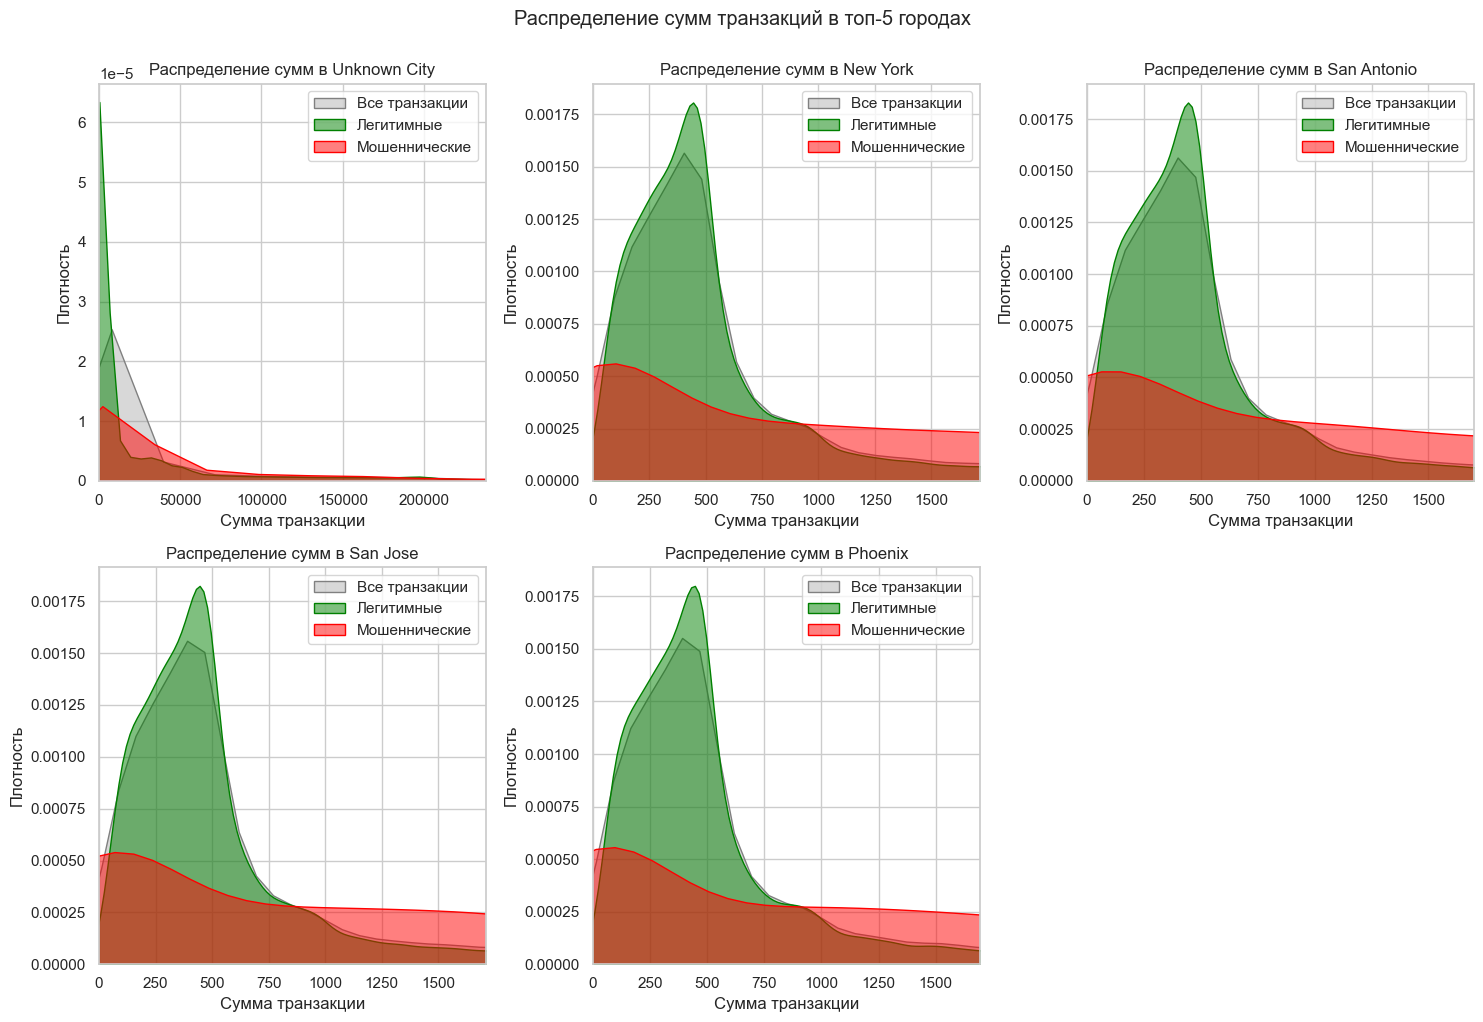

In [5]:
top_cities = fraud_data.groupby('city')['amount'].mean().sort_values(ascending=False).head(5).index

# Фильтрация данных только для топ-5 городов
top_cities_data = fraud_data[fraud_data['city'].isin(top_cities)]

# Настройка стиля графиков
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

# Построение распределений для каждого города
for i, city in enumerate(top_cities, 1):
    plt.subplot(2, 3, i)
    
    # Общее распределение
    sns.kdeplot(data=top_cities_data[top_cities_data['city'] == city], 
                x='amount', 
                color='gray', 
                label='Все транзакции',
                fill=True,
                alpha=0.3)
    
    # Не мошеннические транзакции
    sns.kdeplot(data=top_cities_data[(top_cities_data['city'] == city) & 
                                    (top_cities_data['is_fraud'] == False)], 
                x='amount', 
                color='green', 
                label='Легитимные',
                fill=True,
                alpha=0.5)
    
    # Мошеннические транзакции
    sns.kdeplot(data=top_cities_data[(top_cities_data['city'] == city) & 
                                    (top_cities_data['is_fraud'] == True)], 
                x='amount', 
                color='red', 
                label='Мошеннические',
                fill=True,
                alpha=0.5)
    
    plt.title(f'Распределение сумм в {city}')
    plt.xlabel('Сумма транзакции')
    plt.ylabel('Плотность')
    plt.legend()
    plt.xlim(0, top_cities_data[top_cities_data['city'] == city]['amount'].quantile(0.95))  # Ограничиваем выбросы

plt.tight_layout()
plt.suptitle('Распределение сумм транзакций в топ-5 городах', y=1.02)
plt.show()

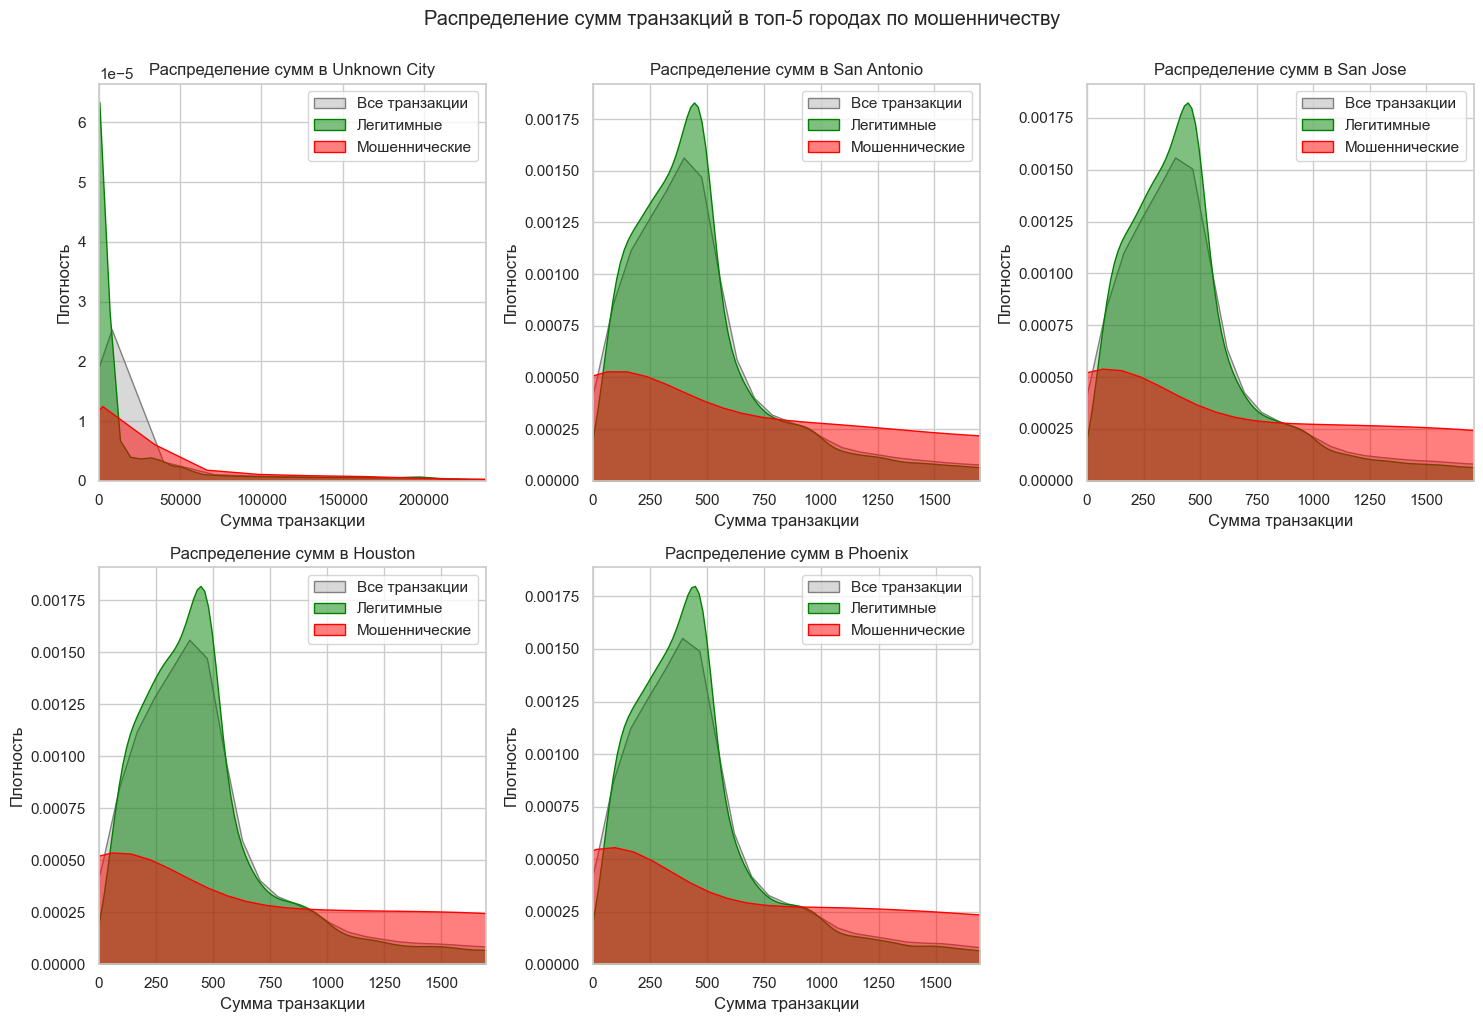

In [31]:
top_cities = fraud_data[fraud_data['is_fraud'] == True].groupby('city')['amount'].mean().sort_values(ascending=False).head(5).index

# Фильтрация данных только для топ-5 городов
top_cities_data = fraud_data[fraud_data['city'].isin(top_cities)]

# Настройка стиля графиков
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

# Построение распределений для каждого города
for i, city in enumerate(top_cities, 1):
    plt.subplot(2, 3, i)
    
    # Общее распределение
    sns.kdeplot(data=top_cities_data[top_cities_data['city'] == city], 
                x='amount', 
                color='gray', 
                label='Все транзакции',
                fill=True,
                alpha=0.3)
    
    # Не мошеннические транзакции
    sns.kdeplot(data=top_cities_data[(top_cities_data['city'] == city) & 
                                    (top_cities_data['is_fraud'] == False)], 
                x='amount', 
                color='green', 
                label='Легитимные',
                fill=True,
                alpha=0.5)
    
    # Мошеннические транзакции
    sns.kdeplot(data=top_cities_data[(top_cities_data['city'] == city) & 
                                    (top_cities_data['is_fraud'] == True)], 
                x='amount', 
                color='red', 
                label='Мошеннические',
                fill=True,
                alpha=0.5)
    
    plt.title(f'Распределение сумм в {city}')
    plt.xlabel('Сумма транзакции')
    plt.ylabel('Плотность')
    plt.legend()
    plt.xlim(0, top_cities_data[top_cities_data['city'] == city]['amount'].quantile(0.95))  # Ограничиваем выбросы

plt.tight_layout()
plt.suptitle('Распределение сумм транзакций в топ-5 городах по мошенничеству', y=1.02)
plt.show()

Однако не совсем правильно сравнивать транзакции в разной валюте, поэтому переведем это в USD

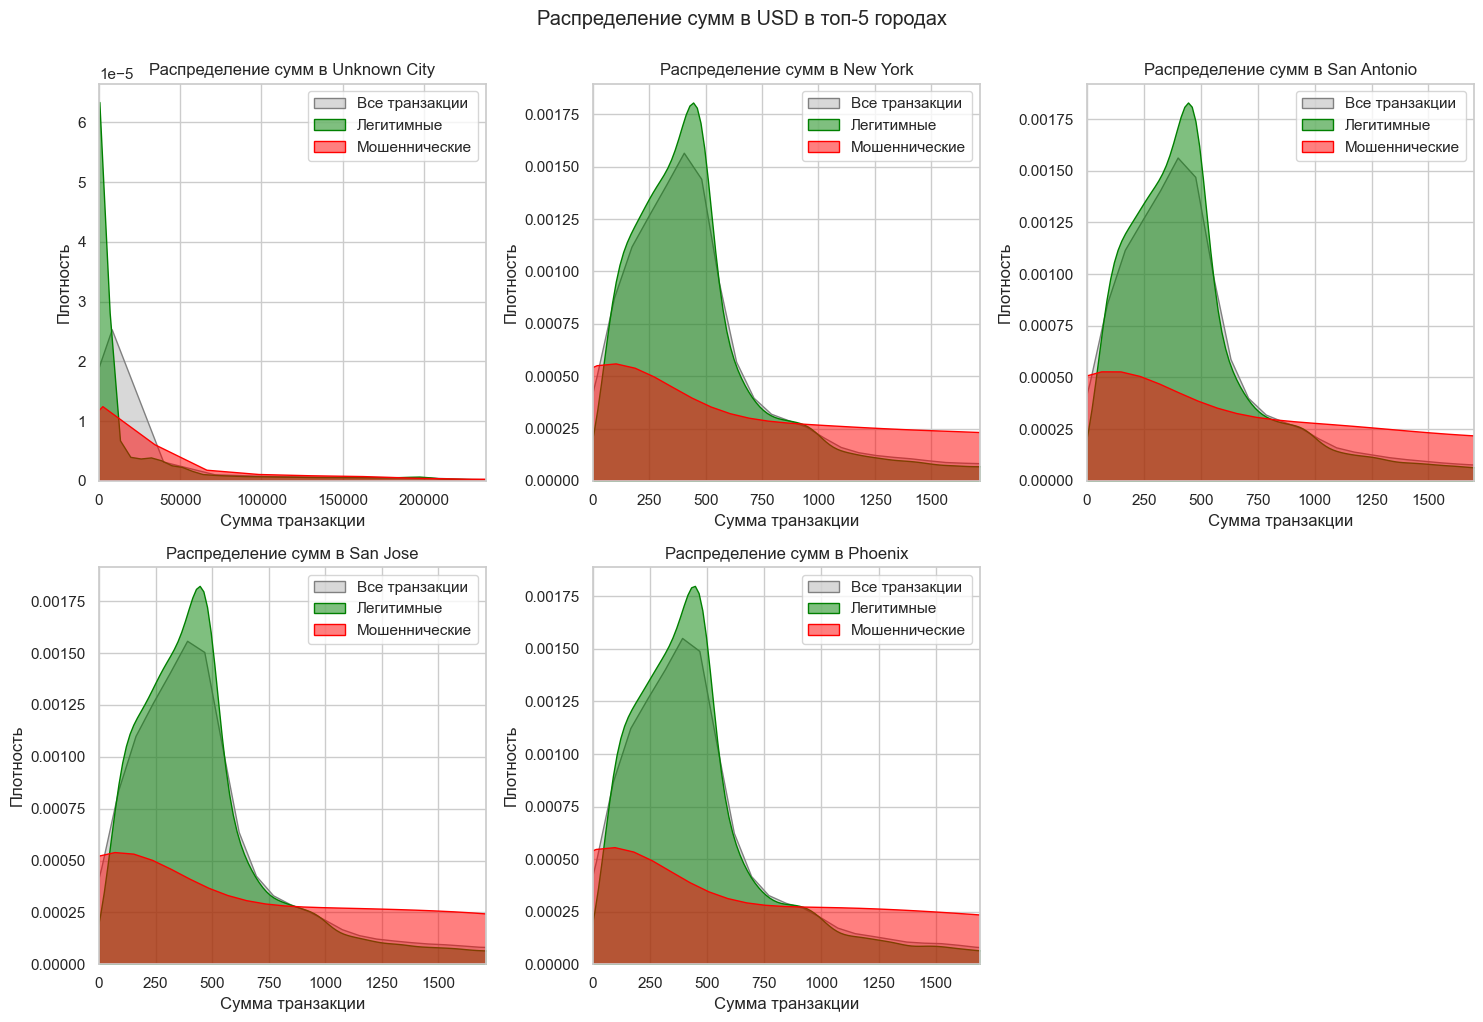

In [7]:
currency_data['date'] = pd.to_datetime(currency_data['date']).dt.date
fraud_data['date'] = pd.to_datetime(fraud_data['timestamp']).dt.date

currency_melted = currency_data.melt(id_vars='date', 
                                   var_name='currency', 
                                   value_name='exchange_rate')

merged_data = pd.merge(fraud_data,
                      currency_melted,
                      left_on=['date', 'currency'],
                      right_on=['date', 'currency'],
                      how='left')
# Заполняем пропущенные курсы (если валюта USD или курс не найден)
merged_data['exchange_rate'] = merged_data['exchange_rate'].fillna(1.0)
# Конвертируем в USD
merged_data['amount'] = merged_data['amount'] / merged_data['exchange_rate']

top_cities = fraud_data.groupby('city')['amount'].mean().sort_values(ascending=False).head(5).index

# Фильтрация данных только для топ-5 городов
top_cities_data = fraud_data[fraud_data['city'].isin(top_cities)]

# Настройка стиля графиков
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

# Построение распределений для каждого города
for i, city in enumerate(top_cities, 1):
    plt.subplot(2, 3, i)
    
    # Общее распределение
    sns.kdeplot(data=top_cities_data[top_cities_data['city'] == city], 
                x='amount', 
                color='gray', 
                label='Все транзакции',
                fill=True,
                alpha=0.3)
    
    # Не мошеннические транзакции
    sns.kdeplot(data=top_cities_data[(top_cities_data['city'] == city) & 
                                    (top_cities_data['is_fraud'] == False)], 
                x='amount', 
                color='green', 
                label='Легитимные',
                fill=True,
                alpha=0.5)
    
    # Мошеннические транзакции
    sns.kdeplot(data=top_cities_data[(top_cities_data['city'] == city) & 
                                    (top_cities_data['is_fraud'] == True)], 
                x='amount', 
                color='red', 
                label='Мошеннические',
                fill=True,
                alpha=0.5)
    
    plt.title(f'Распределение сумм в {city}')
    plt.xlabel('Сумма транзакции')
    plt.ylabel('Плотность')
    plt.legend()
    plt.xlim(0, top_cities_data[top_cities_data['city'] == city]['amount'].quantile(0.95))  # Ограничиваем выбросы

plt.tight_layout()
plt.suptitle('Распределение сумм в USD в топ-5 городах', y=1.02)
plt.show()

Ладно, ничего почти и не поменялось, собственно мошеннические операции все еще выглядят как равномерное с очень большими хвостами. Думаю первый спуск это небольшие скамы а все далее это на усмотрение 'сколько есть на счету'

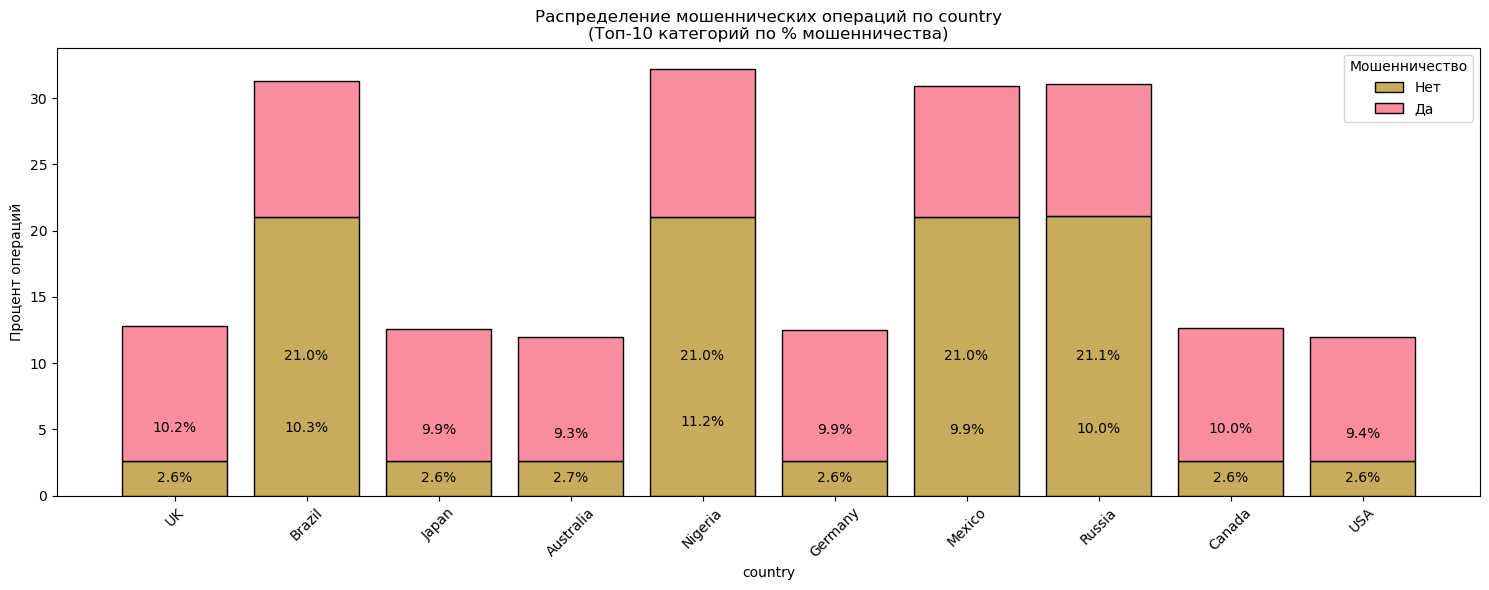

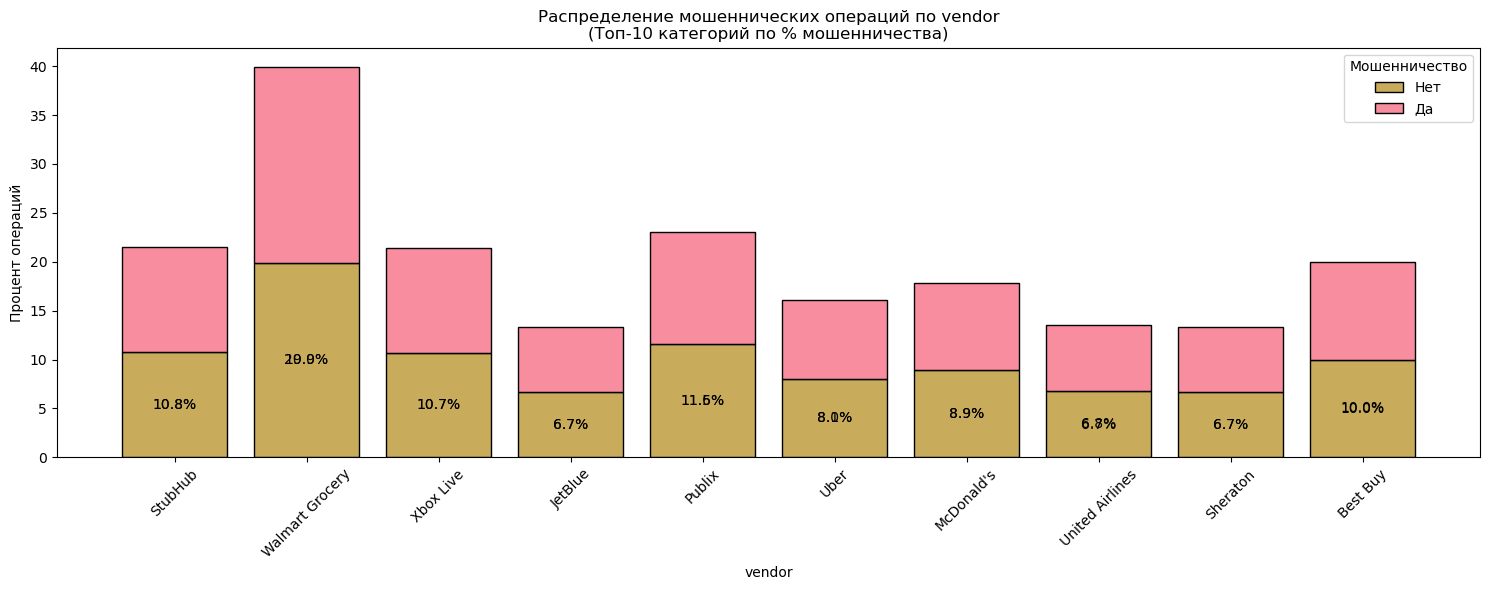

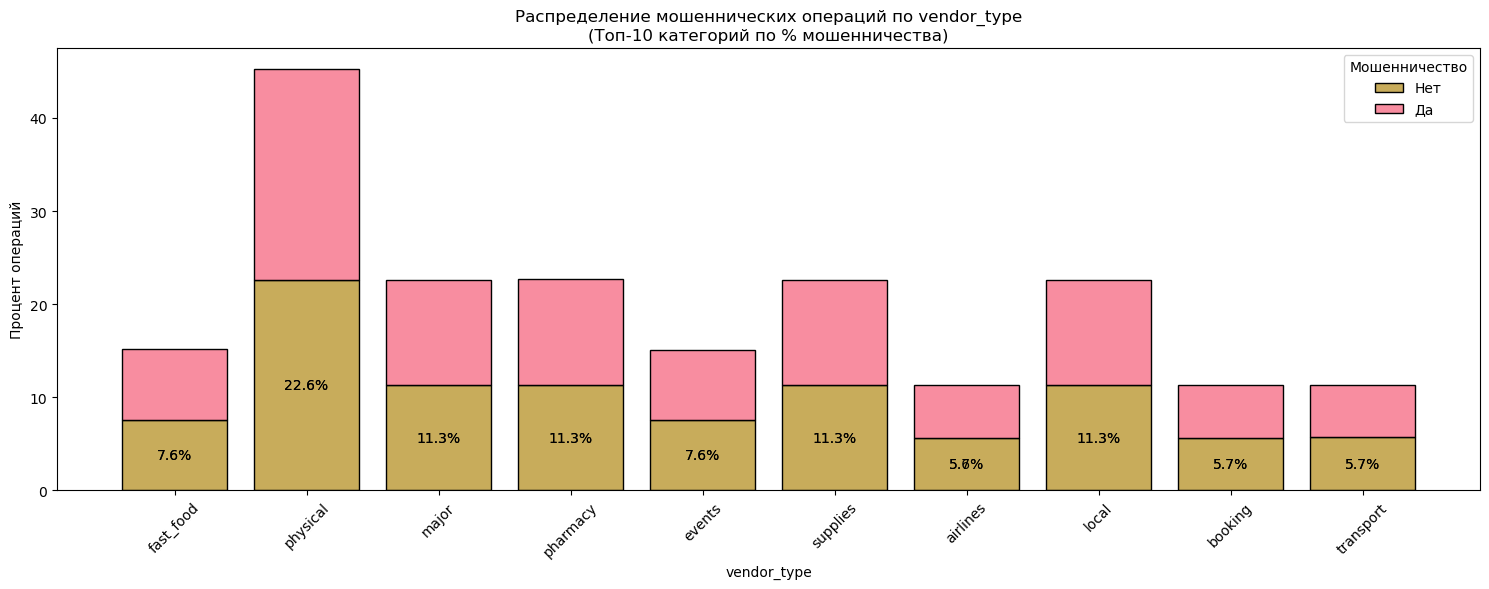

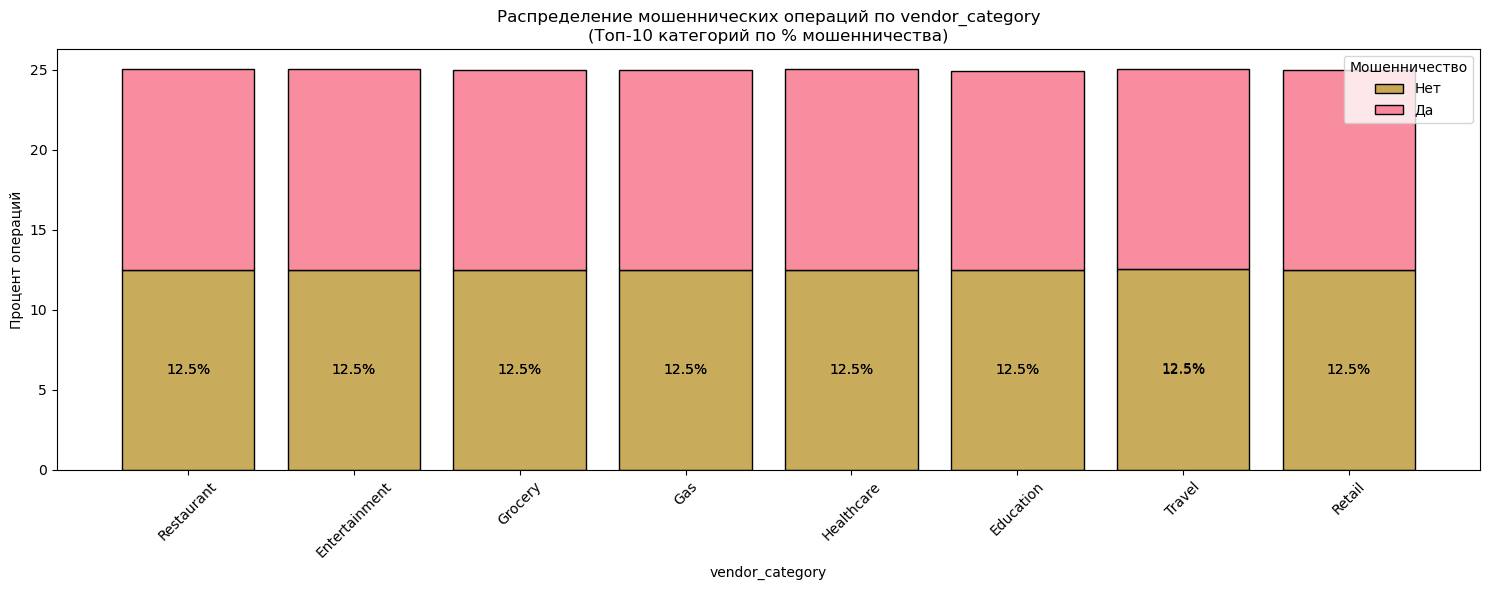

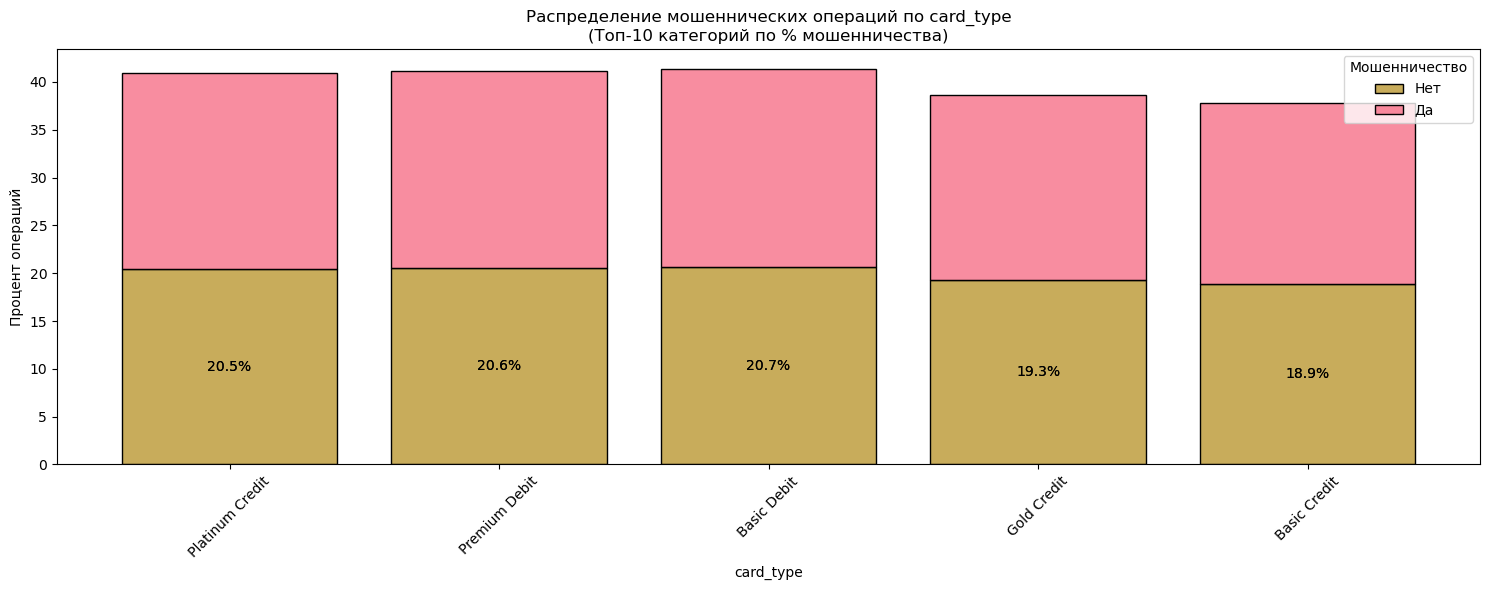

/var/folders/z2/kxjb41213z74h6nbpr1f79sr0000gn/T/ipykernel_19750/1823020618.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette='Reds_r')


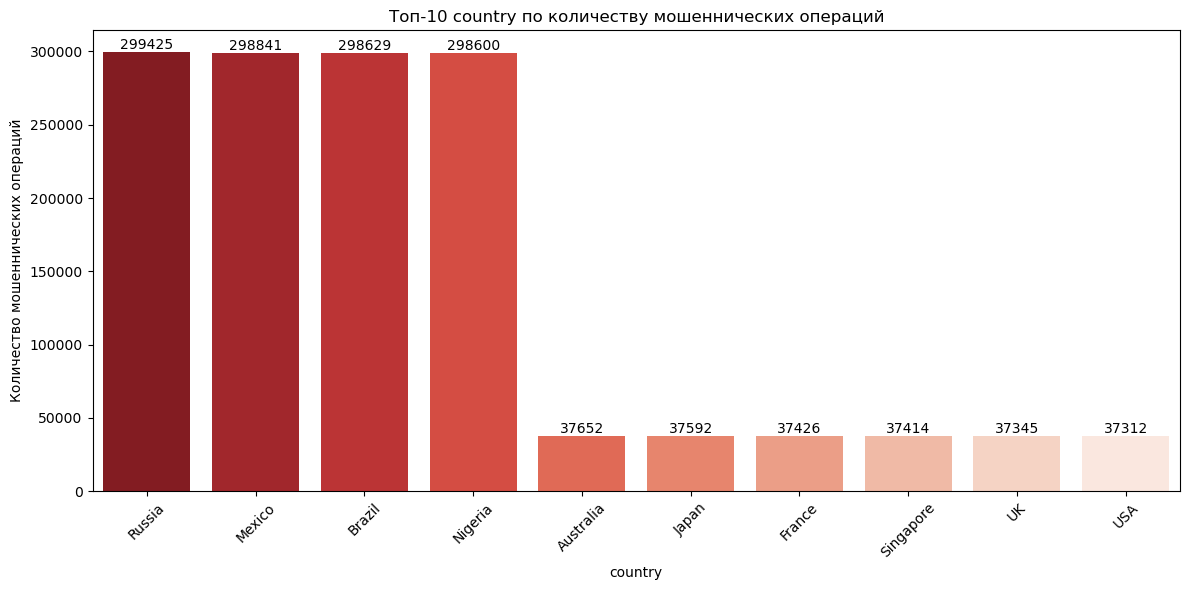

/var/folders/z2/kxjb41213z74h6nbpr1f79sr0000gn/T/ipykernel_19750/1823020618.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette='Reds_r')


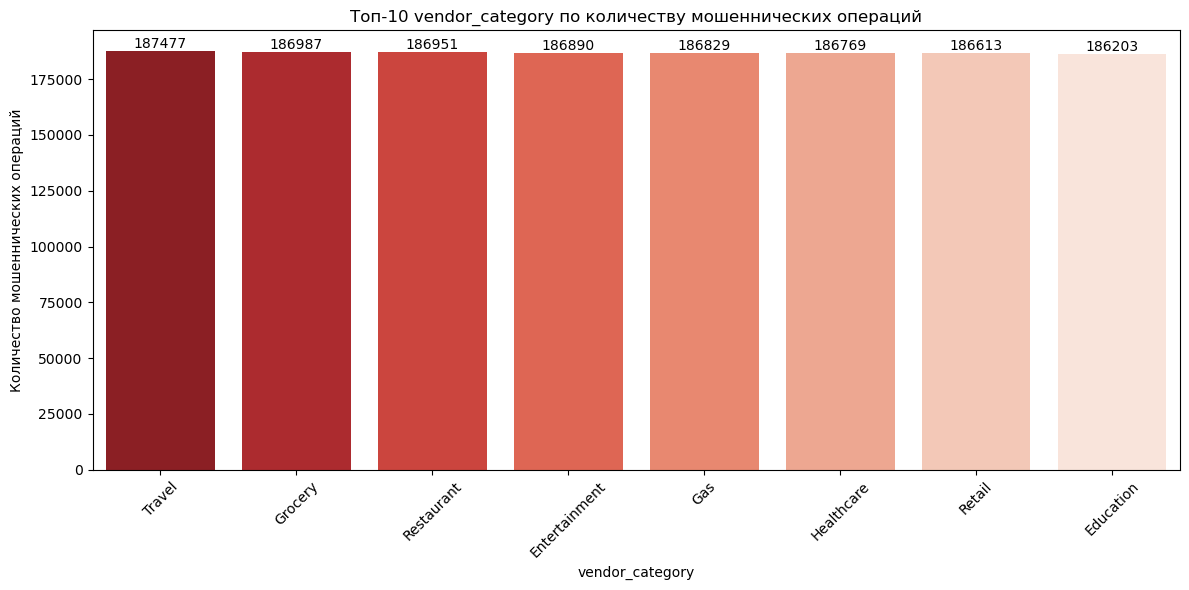

In [4]:
def plot_fraud_distribution(data, column, top_n=10):
    # Вычисляем топ-N категорий с наибольшим % мошенничества
    fraud_rates = (data.groupby(column)['is_fraud']
                  .mean()
                  .sort_values(ascending=False)
                  .head(top_n))
    
    # Фильтруем данные только для топ категорий
    top_data = data[data[column].isin(fraud_rates.index)]
    
    # Настройка графика
    plt.figure(figsize=(15, 6))
    sns.set_palette("husl")
    
    # Гистограмма с накоплением
    ax = sns.histplot(data=top_data, x=column, hue='is_fraud', 
                     multiple='stack', stat='percent', common_norm=False,
                     shrink=0.8, alpha=0.8)
    
    # Добавляем аннотации с % мошенничества
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.text(p.get_x() + p.get_width()/2., height/2, 
                    f'{height:.1f}%', ha='center', va='center')
    
    plt.title(f'Распределение мошеннических операций по {column}\n(Топ-{top_n} категорий по % мошенничества)')
    plt.xlabel(column)
    plt.ylabel('Процент операций')
    plt.xticks(rotation=45)
    plt.legend(title='Мошенничество', labels=['Нет', 'Да'])
    plt.tight_layout()
    plt.show()

# 1. По странам (топ-3 по % мошенничества)
plot_fraud_distribution(fraud_data, 'country')

# 2. По вендорам (топ-3)
plot_fraud_distribution(fraud_data, 'vendor')

# 3. По типам вендоров
plot_fraud_distribution(fraud_data, 'vendor_type')

# 4. По категориям вендоров
plot_fraud_distribution(fraud_data, 'vendor_category')

# 5. По типам карт
plot_fraud_distribution(fraud_data, 'card_type')

# Дополнительно: абсолютные числа мошеннических операций
def plot_top_fraud_counts(data, column, top_n=10):
    fraud_counts = (data[data['is_fraud']]
                   .groupby(column)
                   .size()
                   .sort_values(ascending=False)
                   .head(top_n))
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette='Reds_r')
    plt.title(f'Топ-{top_n} {column} по количеству мошеннических операций')
    plt.xlabel(column)
    plt.ylabel('Количество мошеннических операций')
    plt.xticks(rotation=45)
    for i, v in enumerate(fraud_counts.values):
        plt.text(i, v, str(v), ha='center', va='bottom')
    plt.tight_layout()
    plt.show()

plot_top_fraud_counts(fraud_data, 'country')
plot_top_fraud_counts(fraud_data, 'vendor_category')

Из этого делаем вывод что тип карты или vendor_category слабо определяет мошеннические операции. Наверное они рандомно шифруются
Однако страны которые используются для операций вполне конкретные - топ 4. Они же выделяются по проценту мошенничества.
Давайте еще посчитаем корреляюцию чтобы больше убедиться

### Корреляции

/var/folders/z2/kxjb41213z74h6nbpr1f79sr0000gn/T/ipykernel_19750/3643399956.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_features.index, x=top_features['corr_with_fraud'], palette='coolwarm')


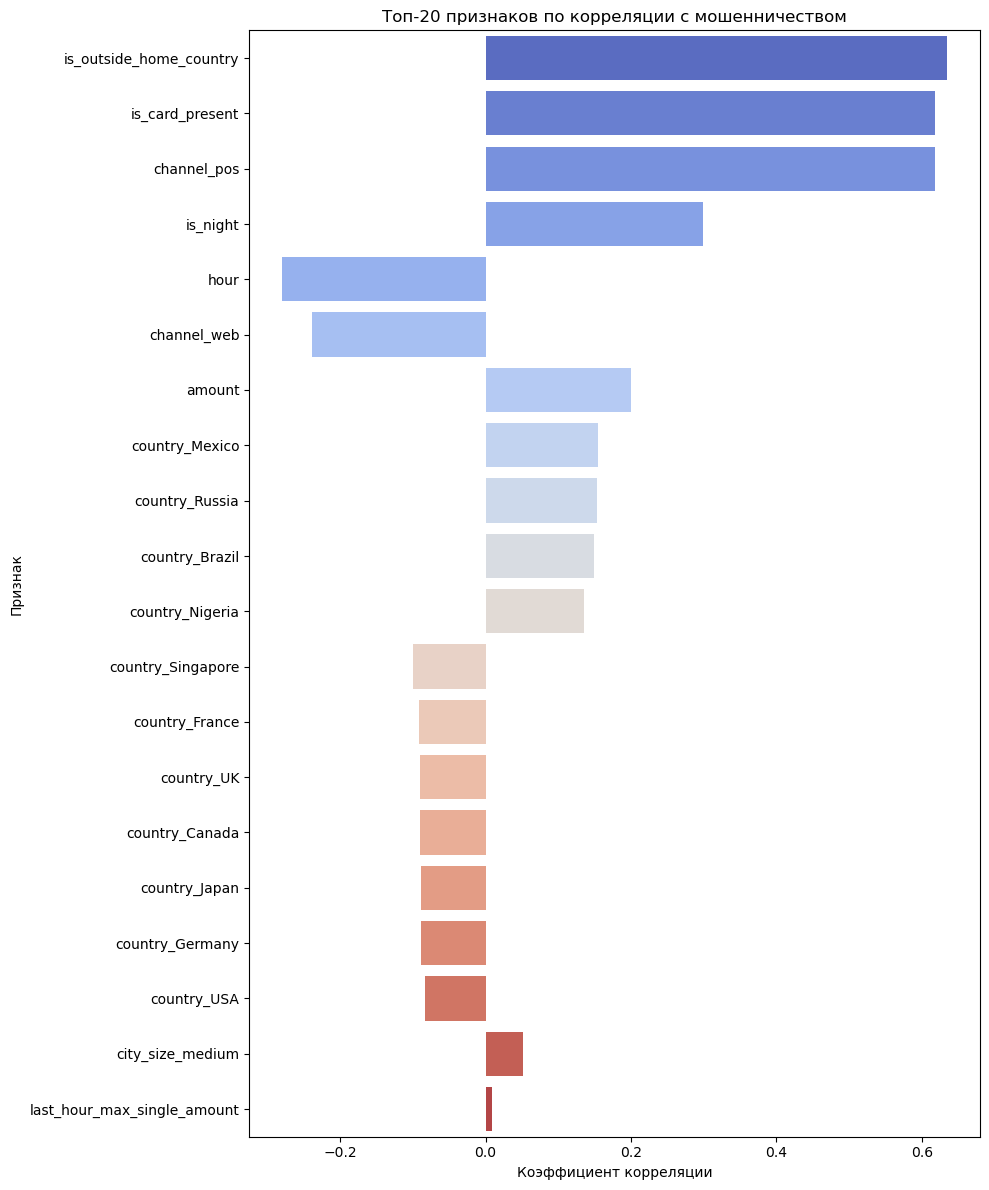

Топ-20 признаков по абсолютной корреляции с мошенничеством:
                         corr_with_fraud  abs_corr
is_fraud                        1.000000  1.000000
is_outside_home_country         0.634459  0.634459
is_card_present                 0.617886  0.617886
channel_pos                     0.617886  0.617886
is_night                        0.299215  0.299215
hour                           -0.279624  0.279624
channel_web                    -0.239029  0.239029
amount                          0.199342  0.199342
country_Mexico                  0.154733  0.154733
country_Russia                  0.152935  0.152935
country_Brazil                  0.148761  0.148761
country_Nigeria                 0.135749  0.135749
country_Singapore              -0.099520  0.099520
country_France                 -0.091204  0.091204
country_UK                     -0.090805  0.090805
country_Canada                 -0.089830  0.089830
country_Japan                  -0.088464  0.088464
country_Germany       

In [5]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных
fraud_data = pd.read_parquet('transaction_fraud_data.parquet')

# Преобразование timestamp в datetime
fraud_data['timestamp'] = pd.to_datetime(fraud_data['timestamp'])

# Создание новых временных признаков
fraud_data['hour'] = fraud_data['timestamp'].dt.hour
fraud_data['day_of_week'] = fraud_data['timestamp'].dt.dayofweek  # 0-понедельник
fraud_data['is_weekend'] = fraud_data['day_of_week'].isin([5, 6]).astype(int)
fraud_data['is_night'] = ((fraud_data['hour'] >= 22) | (fraud_data['hour'] <= 6)).astype(int)

# Распаковка last_hour_activity
for col in ['num_transactions', 'total_amount', 'unique_merchants', 'unique_countries', 'max_single_amount']:
    fraud_data[f'last_hour_{col}'] = fraud_data['last_hour_activity'].apply(lambda x: x[col] if pd.notnull(x) else np.nan)

# Преобразование категориальных признаков (one-hot encoding)
categorical_cols = ['vendor_category', 'vendor_type', 'country', 'city_size', 'card_type', 'channel']
fraud_data = pd.get_dummies(fraud_data, columns=categorical_cols, drop_first=True)

# Выбор числовых и бинарных признаков
numeric_cols = ['amount', 'hour', 'day_of_week', 
                'last_hour_num_transactions', 'last_hour_total_amount',
                'last_hour_unique_merchants', 'last_hour_unique_countries',
                'last_hour_max_single_amount']

binary_cols = ['is_card_present', 'is_outside_home_country', 
              'is_high_risk_vendor', 'is_weekend', 'is_night'] + \
             [col for col in fraud_data.columns if col.startswith(('vendor_category_', 'vendor_type_', 
                                                                'country_', 'city_size_', 
                                                                'card_type_', 'channel_'))]

# Создание таблицы корреляций
corr_data = fraud_data[numeric_cols + binary_cols + ['is_fraud']].copy()

# Расчет корреляций (Point-Biserial для числовых vs бинарной целевой)
correlations = pd.DataFrame(index=corr_data.columns)
correlations['corr_with_fraud'] = corr_data.corrwith(corr_data['is_fraud'], method='pearson')
correlations['abs_corr'] = correlations['corr_with_fraud'].abs()
correlations = correlations.sort_values('abs_corr', ascending=False)

# Визуализация топ-20 корреляций
plt.figure(figsize=(10, 12))
top_features = correlations.iloc[1:21]  # Исключаем is_fraud
sns.barplot(y=top_features.index, x=top_features['corr_with_fraud'], palette='coolwarm')
plt.title('Топ-20 признаков по корреляции с мошенничеством')
plt.xlabel('Коэффициент корреляции')
plt.ylabel('Признак')
plt.tight_layout()
plt.show()

# Вывод таблицы корреляций
print("Топ-20 признаков по абсолютной корреляции с мошенничеством:")
print(correlations.head(20))

# Сохранение расширенного датасета
fraud_data.to_parquet('enhanced_fraud_data.parquet', index=False)

In [6]:
# Оставляем только признаки с корреляцией выше порога
significant_features = correlations[correlations['abs_corr'] > 0.05].index
significant_features

Index(['is_fraud', 'is_outside_home_country', 'is_card_present', 'channel_pos',
       'is_night', 'hour', 'channel_web', 'amount', 'country_Mexico',
       'country_Russia', 'country_Brazil', 'country_Nigeria',
       'country_Singapore', 'country_France', 'country_UK', 'country_Canada',
       'country_Japan', 'country_Germany', 'country_USA', 'city_size_medium'],
      dtype='object')

### Катбусты

Как будто у нас есть корреляция с is_outside_home_country, is_card_present, channel_pos и is_night но не со временем. Занятно...
Давайте попробуем обучить катбуст на данных чтобы понять какие признаки более важны

In [ ]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


fraud_data = pd.read_parquet('transaction_fraud_data.parquet')

# Создание новых признаков
fraud_data['hour'] = fraud_data['timestamp'].dt.hour
fraud_data['day_of_week'] = fraud_data['timestamp'].dt.dayofweek
fraud_data['is_weekend'] = fraud_data['day_of_week'].isin([5, 6]).astype(int)
fraud_data['is_night'] = ((fraud_data['hour'] >= 22) | (fraud_data['hour'] <= 6)).astype(int)

# Распаковка last_hour_activity
for col in ['num_transactions', 'total_amount', 'unique_merchants', 'unique_countries', 'max_single_amount']:
    fraud_data[f'last_hour_{col}'] = fraud_data['last_hour_activity'].apply(lambda x: x[col] if pd.notnull(x) else np.nan)

# Выбор фичей и таргета
features = ['amount', 'hour', 'day_of_week', 'is_weekend', 'is_night',
            'is_card_present', 'is_outside_home_country', 'is_high_risk_vendor',
            'last_hour_num_transactions', 'last_hour_total_amount',
            'last_hour_unique_merchants', 'last_hour_unique_countries',
            'last_hour_max_single_amount', 'vendor_category', 'vendor_type',
            'country', 'city_size', 'card_type', 'channel', 'device']

target = 'is_fraud'

CatBoostError: Bad value for num_feature[non_default_doc_idx=0,feature_idx=13]="Gas": Cannot convert 'Gas' to float

In [19]:
numeric_cols = ['amount', 'hour', 'day_of_week', 'is_weekend', 'is_night',
               'is_card_present', 'is_outside_home_country', 'is_high_risk_vendor',
               'last_hour_num_transactions', 'last_hour_total_amount',
               'last_hour_unique_merchants', 'last_hour_unique_countries',
               'last_hour_max_single_amount']

# Преобразуем числовые колонки
for col in numeric_cols:
    fraud_data[col] = pd.to_numeric(fraud_data[col], errors='coerce')  # Заменяем нечисловые значения на NaN
    fraud_data[col] = fraud_data[col].fillna(fraud_data[col].median())  # Заполняем пропуски медианой

# Явно укажем категориальные признаки
cat_features = ['vendor_category', 'vendor_type', 'country', 
               'city_size', 'card_type', 'channel', 'device']

# Проверим категориальные признаки на уникальные значения
for col in cat_features:
    print(f"{col}: {fraud_data[col].nunique()} unique values")
    # Если уникальных значений слишком много (>100), можно объединить редкие
    if fraud_data[col].nunique() > 100:
        top_categories = fraud_data[col].value_counts().head(50).index
        fraud_data[col] = fraud_data[col].where(fraud_data[col].isin(top_categories), 'Other')

# Создадим финальный набор данных
X = fraud_data[features]
y = fraud_data[target]

vendor_category: 8 unique values
vendor_type: 17 unique values
country: 12 unique values
city_size: 2 unique values
card_type: 5 unique values
channel: 3 unique values
device: 9 unique values


In [ ]:
features = ['amount', 'hour', 'day_of_week', 'is_weekend', 'is_night',
            'is_card_present', 'is_outside_home_country', 'is_high_risk_vendor',
            'last_hour_num_transactions', 'last_hour_total_amount',
            'last_hour_unique_merchants', 'last_hour_unique_countries',
            'last_hour_max_single_amount', 'vendor_category', 'vendor_type',
            'country', 'city_size', 'card_type', 'channel', 'device']


In [25]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split

# Загрузка данных
fraud_data = pd.read_parquet('transaction_fraud_data.parquet')
# Создание новых признаков
fraud_data['hour'] = fraud_data['timestamp'].dt.hour
fraud_data['day_of_week'] = fraud_data['timestamp'].dt.dayofweek
fraud_data['is_weekend'] = fraud_data['day_of_week'].isin([5, 6]).astype(int)
fraud_data['is_night'] = ((fraud_data['hour'] >= 22) | (fraud_data['hour'] <= 6)).astype(int)

# 1. Подготовка данных
# Удаляем проблемные столбцы (если есть)
fraud_data = fraud_data.drop(columns=['device_fingerprint', 'ip_address'], errors='ignore')

numeric_cols = ['amount', 'hour', 'day_of_week', 'is_weekend', 'is_night',
               'is_card_present', 'is_outside_home_country', 'is_high_risk_vendor',
               'last_hour_num_transactions', 'last_hour_total_amount',
               'last_hour_unique_merchants', 'last_hour_unique_countries',
               'last_hour_max_single_amount']

# Распаковка last_hour_activity
for col in ['num_transactions', 'total_amount', 'unique_merchants', 'unique_countries', 'max_single_amount']:
    fraud_data[f'last_hour_{col}'] = fraud_data['last_hour_activity'].apply(lambda x: x[col] if pd.notnull(x) else np.nan)

# Преобразуем числовые колонки
for col in numeric_cols:
    fraud_data[col] = pd.to_numeric(fraud_data[col], errors='coerce')  # Заменяем нечисловые значения на NaN
    fraud_data[col] = fraud_data[col].fillna(fraud_data[col].median())  # Заполняем пропуски медианой

cat_features = [var for var in X_train.columns if X_train[var].dtype == "O"]
for col in cat_features:
    print(f"{col}: {fraud_data[col].nunique()} unique values")
    # Если уникальных значений слишком много (>100), можно объединить редкие
    if fraud_data[col].nunique() > 100:
        top_categories = fraud_data[col].value_counts().head(50).index
        fraud_data[col] = fraud_data[col].where(fraud_data[col].isin(top_categories), 'Other')

# 2. Создаем фичи
features = [
    'amount', 'hour', 'day_of_week', 'is_weekend', 'is_night',
    'is_card_present', 'is_outside_home_country', 'is_high_risk_vendor',
    'vendor_category', 'vendor_type', 'country', 'city_size', 'card_type', 'channel'
]

# 3. Явно преобразуем типы данных
dtype_map = {
    'amount': 'float32',
    'hour': 'int8',
    'day_of_week': 'int8',
    'is_weekend': 'int8',
    'is_night': 'int8',
    'is_card_present': 'int8',
    'is_outside_home_country': 'int8',
    'is_high_risk_vendor': 'int8'
}

for col, dtype in dtype_map.items():
    fraud_data[col] = fraud_data[col].astype(dtype)

# 4. Обработка категориальных признаков
cat_features = ['vendor_category', 'vendor_type', 'country', 'city_size', 'card_type', 'channel']

# Удаляем строки с NaN в категориальных признаках
fraud_data = fraud_data.dropna(subset=cat_features)

# 5. Подготовка Pool (важная часть!)
X = fraud_data[features]
y = fraud_data['is_fraud'].astype(int)

# Явное создание Pool с указанием типов
train_pool = Pool(
    data=X,
    label=y,
    cat_features=cat_features,
    feature_names=list(X.columns)
)

# 6. Проверка перед обучением
print("\nПроверка типов данных:")
print(X.dtypes)

print("\nПример данных:")
print(X.head())

# 7. Обучение модели
model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    eval_metric='F1',
    early_stopping_rounds=20,
    random_seed=42,
    verbose=10
)

model.fit(train_pool)


Проверка типов данных:
amount                     float32
hour                          int8
day_of_week                   int8
is_weekend                    int8
is_night                      int8
is_card_present               int8
is_outside_home_country       int8
is_high_risk_vendor           int8
vendor_category             object
vendor_type                 object
country                     object
city_size                   object
card_type                   object
channel                     object
dtype: object

Пример данных:
          amount  hour  day_of_week  is_weekend  is_night  is_card_present  \
0     294.869995     0            0           0         1                0   
1    3368.969971     0            0           0         1                0   
2  102582.382812     0            0           0         1                0   
3     630.599976     0            0           0         1                0   
4  724949.250000     0            0           0         1         

              precision    recall  f1-score   support

       False       0.98      0.99      0.99   1796714
        True       0.98      0.92      0.95    448416

    accuracy                           0.98   2245130
   macro avg       0.98      0.96      0.97   2245130
weighted avg       0.98      0.98      0.98   2245130



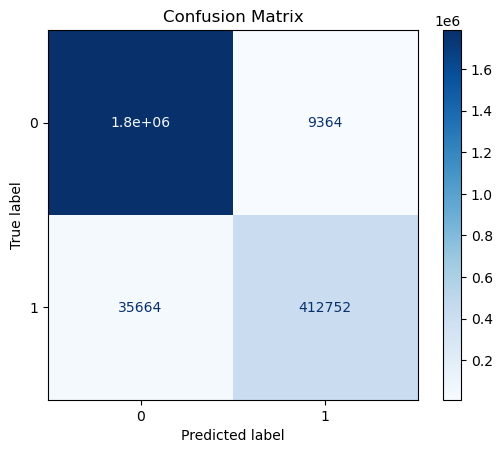

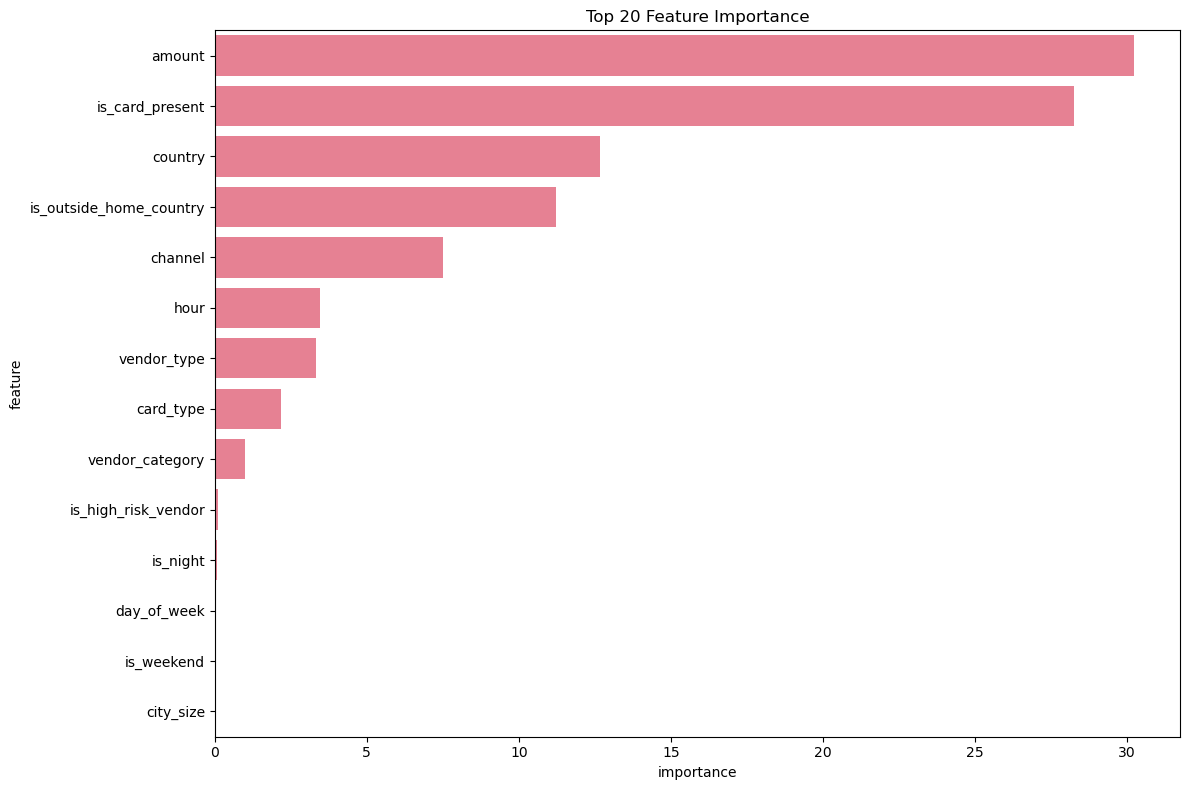

In [30]:
test_pool = Pool(
    X_test,
    y_test,
    cat_features=[var for var in X_train.columns if X_train[var].dtype == "O"]
)

y_pred = model.predict(test_pool)
print(classification_report(y_test, y_pred))

# Матрица ошибок
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Анализ важности признаков
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': model.get_feature_importance()
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance.head(20))
plt.title('Top 20 Feature Importance')
plt.tight_layout()
plt.show()

# Сохранение модели
model.save_model('fraud_detection_model.cbm')

Ну даже на покоцанных признаках выглядит весьма неплохо! Хорошее качество + явные корреляции с признаками

In [32]:
feature_importance.head(20)

,feature,importance
0,amount,30.233614
5,is_card_present,28.257401
10,country,12.659640
6,is_outside_home_country,11.206159
13,channel,7.491431
1,hour,3.473219
9,vendor_type,3.342152
12,card_type,2.180499
8,vendor_category,0.987613
7,is_high_risk_vendor,0.100518
